In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

headers = headers = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}

# Data Collection

## Target Data
Want to predict American spending on Christmas in 2023 based on data in previous years. Data collected from National Retail Federation

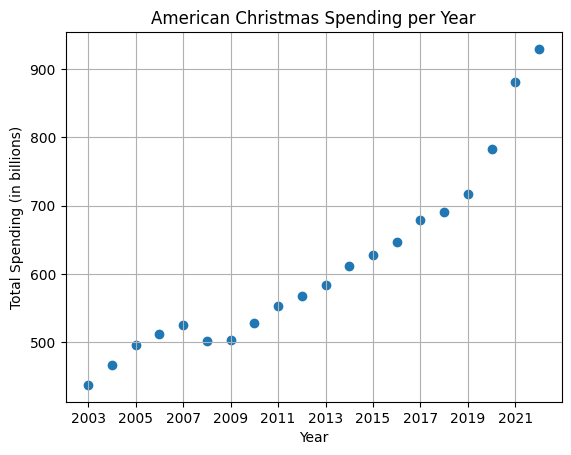

In [8]:
time = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# in billions of dollars
nrf_data = [437.6, 467.2, 496.0, 512.1, 526.0, 501.5, 502.7, 528.8, 553.3, 567.6, 583.2, 611.1, 628.0, 646.7, 678.9, 690.8, 716.9, 782.3, 881.6, 929.5]


# create initial plot of the data


plt.scatter(time, nrf_data, marker='o')

plt.xlabel('Year')
plt.ylabel('Total Spending (in billions)')
plt.title('American Christmas Spending per Year')
plt.xticks(time[::2])
plt.grid()
plt.show()

## Features

Creating features here might be a bit difficult. Here's some main ideas:

- American GDP
- American Population
- Average income
- Previous year's spending (note that to include this, we need to remove 2003)
- Unemployment rate
- Consumer Confidence Index
- Interest Rate
- Inflation Rate
- Taxation
- Real estate market

It's also important we get the information for the current year!

In [ ]:
# US GDP (in billions) Data 2003-2022
# from https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product
us_gdp = [
    11456.44,
    12217.19,
    13039.20,
    13815.59,
    14474.23,
    14769.86,
    14478.06,
    15048.96,
    15599.73,
    16253.97,
    16843.19,
    17550.68,
    18206.02,
    18695.11,
    19477.34,
    20533.06,
    21380.98,
    21060.47,
    23315.08,
    25462.70
]


# GDP for 2023 (best estimate)

In [ ]:
# US population
# Using beautifulsoup from same website
url_pop = 'https://www.macrotrends.net/countries/USA/united-states/population'
content_pop = requests.get(url_pop, headers=headers)

In [116]:
s = BeautifulSoup(content_pop.text, 'html.parser')

# select table
a = s.find_all('table', class_='historical_data_table table table-striped table-bordered')[1]

# starts from idx 2 is 2023, idx 22 is 2003
us_pop = []

for i in range(22, 1, -1):
    us_pop.append(int(a.find_all('tr')[i].text.strip()[5:16].replace(',', '')))

[291109820, 293947885, 296842670, 299753098, 302743399, 305694910, 308512035, 311182845, 313876608, 316651321, 319375166, 322033964, 324607776, 327210198, 329791231, 332140037, 334319671, 335942003, 336997624, 338289857, 339996563]


In [117]:
# US median income
# From Statista
url_income = 'https://www.statista.com/statistics/200838/median-household-income-in-the-united-states/'
content_income = requests.get(url_income, headers=headers)

In [118]:
# Unemployment rate
# from investopedia

url_unem = 'https://www.investopedia.com/historical-us-unemployment-rate-by-year-7495494'
content_unem = requests.get(url_unem, headers=headers)

In [152]:
unem = BeautifulSoup(content_unem.text, 'html.parser')

us_unem = []
# 2003 to 2022 occurs at 76 through 95
for i in range(76, 96):
    data = unem.find('table', class_='mntl-sc-block-table__table').find_all('tr')[i].text
    us_unem.append(float(data[6:data.find('%')]))

In [154]:
variables = {
    'gdp' : us_gdp,
    'population' : us_pop,
    'unemployment_rate': us_unem
}

SyntaxError: ':' expected after dictionary key (2164425181.py, line 4)